DC, for the Employment data analysis Please do the Data preparatin as following:

Get the following fields from the CICdata

  customer_id, TIN, run_date, occupationdesc, occupationstatusdesc, TradeName, employment_duration_in_days (DateHiredTo or run_date - DateHiredFrom), PSICdesc, AnnualMonthlyIndicator, Currency, GrossIncome, max_sanctioned_amt_24m, max_creditcard_limit_24m, max_financed_amt_24m, tot_granted_contracts_cnt_24m, tot_granted_contracts_amt_12m, max_sanctioned_amt_12m, Max_CreditCard_limit_12m, max_financed_amt_12m, tot_granted_contracts_cnt_12m, tot_granted_contracts_amt_12m
  
  Get the self declared employment details, application_date,  and MaxSalary information from our internal Salary scaling table using the CustomerID or TIN and application_date = run_date
  
  Get the gender, age, region, province of the customer from demographic table using customer_id or TIN and application_date = run_date
  
  Get the following fields from the Credolab tables using the customer_id or mobile number and application_date = run date:
  Device Price
  Device Manufacturer (Apple/ Samsung/ Oppo etc.)
  Device Model
  Device Age (usually derived by the application_date - earliest apps installation date)
  number of job search apps installed (linkedin, jobstreet, glint etc.)
  number of professional apps installed (office, gdrive etc)
  number of ecommerce apps installed (lazada, shopee, shein, zalora, temu etc.)
  number of ride hailing apps installed (grab, moveit etc.)
  number of finance apps installed (Banking apps, FinTech apps, eWallet apps)
  number of Risky apps (gambling apps, crypto apps, payday loan apps)
  number of OTT apps (Netflix, PrimeVideo etc.)
  Sowndarya: may be you can share your earlier apps categorisation work with DC for this. To keep things simple, just give him your final app categorisation mapping.

DC, next steps on the Income data:<br>
Tradename column from CICdata is missing, pls add it<br>
Calculate the employment duration (if no end date then run date - start date, otherwise end date - start date, if no start date then null)<br>
Create two additional flags from CICdata:<br>
--> Has Credit Loan (credit_loan_flag)<br>
--> Has Installment loan flag (inst_loan_flag)<br>
Add the other Credolab fields:<br>
--> App category wise count (just use Credolab app categories)<br>
-->  Device Brand (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.device_brand)<br>
--> Device Model (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.device_model)<br>
--> Network Provider (from credolab_raw.android_credolab_datasets_struct_columns` select GeneralData.sim_operator_name)<br>
--> Number of BlueTooth Device (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.bluetooth__bonded_devices_count)<br>

# <div align="center" style="color: #ff5733;">Income Estimation Data Preparation</div>

# Declare Libraries

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

import time

In [23]:
sq = """
with base as
(
-- Query for dfgranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  ContractHistoryType,
  CBContractCode,
  ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  ContractStartDate,
  ContractStatus,
  ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  Currency,
  CurrencyDesc,
  LastUpdateDate,
  OriginalCurrency,
  OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  BilledAmount,
  BoardResolutionFlag,
  BoardResolutionFlagDesc,
  CancellationDate,
  CardReferenceCode,
  ChargedAmount,
  CreditLimit,
  CreditPurpose,
  CreditPurposeDesc,
  FinancedAmount,
  FirstPaymentDate,
  FlagCardUsed,
  HolderLiability,
  HolderLiabilityDesc,
  InstallmentType,
  InstallmentTypeDesc,
  InstallmentsNumber,
  LastChargeDate,
  LastPaymentAmount,
  LastPaymentDate,
  MinPaymentIndicator,
  MinPaymentIndicatorDesc,
  MinPaymentPercentage,
  MonthlyPaymentAmount,
  NextPayment,
  NextPaymentDate,
  OutstandingBalance,
  OutstandingBalanceUnbilled,
  OutstandingPaymentsNumber,
  OverallCreditLimit,
  OverdueDays,
  OverdueDaysDesc,
  OverduePaymentsAmount,
  OverduePaymentsNumber,
  PaymentMethod,
  PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  PremiumCard,
  PremiumCardDesc,
  ReorganizedCreditCode,
  ReorganizedCreditCodeDesc,
  ServicesLinesNo,
  TimesCardUsed,
  TransactionType,
  TransactionTypeDesc,
  Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  NULL AS ContractRequestDate,
  'granted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.granted_contracts

UNION ALL

-- Query for dfnongranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  NULL AS ContractHistoryType,
  CBContractCode,
  NULL AS ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  NULL AS ContractStartDate,
  NULL AS ContractStatus,
  NULL AS ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  NULL AS Currency,
  NULL AS CurrencyDesc,
  LastUpdateDate,
  NULL AS OriginalCurrency,
  NULL AS OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  NULL AS BilledAmount,
  NULL AS BoardResolutionFlag,
  NULL AS BoardResolutionFlagDesc,
  NULL AS CancellationDate,
  NULL AS CardReferenceCode,
  NULL AS ChargedAmount,
  CreditLimit,
  NULL AS CreditPurpose,
  NULL AS CreditPurposeDesc,
  FinancedAmount,
  NULL AS FirstPaymentDate,
  NULL AS FlagCardUsed,
  NULL AS HolderLiability,
  NULL AS HolderLiabilityDesc,
  NULL AS InstallmentType,
  NULL AS InstallmentTypeDesc,
  InstallmentsNumber,
  NULL AS LastChargeDate,
  NULL AS LastPaymentAmount,
  NULL AS LastPaymentDate,
  NULL AS MinPaymentIndicator,
  NULL AS MinPaymentIndicatorDesc,
  NULL AS MinPaymentPercentage,
  MonthlyPaymentAmount,
  NULL AS NextPayment,
  NULL AS NextPaymentDate,
  NULL AS OutstandingBalance,
  NULL AS OutstandingBalanceUnbilled,
  NULL AS OutstandingPaymentsNumber,
  NULL AS OverallCreditLimit,
  NULL AS OverdueDays,
  NULL AS OverdueDaysDesc,
  NULL AS OverduePaymentsAmount,
  NULL AS OverduePaymentsNumber,
  NULL AS PaymentMethod,
  NULL AS PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  NULL AS PremiumCard,
  NULL AS PremiumCardDesc,
  NULL AS ReorganizedCreditCode,
  NULL AS ReorganizedCreditCodeDesc,
  NULL AS ServicesLinesNo,
  NULL AS TimesCardUsed,
  NULL AS TransactionType,
  NULL AS TransactionTypeDesc,
  NULL AS Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  ContractRequestDate,
  'nongranted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.notgranted_contracts
),
base2 as
(select distinct * from base),
loanmaster as --- data from loan master for customer demographic details
(select distinct customerId, digitalLoanAccountId, loanAccountNumber, startApplyDateTime, natureofwork,industryDescription, incomeMultiple, employmentstatus,credolabScore,city,
       barangay, province, postalCode, age, monthlyIncome,  tinNumber, gender, dateOfBirth, email, mobileNo,firstName, middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity,  tsa_onboarding_time,new_loan_type, dependentsCount,
       cast(incomeperSalaryScale as numeric) incomeperSalaryScale
 from prj-prod-dataplatform.risk_credit_mis.loan_master_table),
employmentdata as ---- data from employment table for employment related information
(SELECT distinct
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  AnnualMonthlyIndicator,
  Currency,
  DateHiredFrom,
  DateHiredTo,
  case when DateHiredFrom is null then null
       when DateHiredFrom is not null and  DateHiredTo is not null then date_diff(date(DateHiredTo), date(DateHiredFrom), month)
       when DateHiredFrom is not null and DateHiredTo is null then date_diff(date((select min(run_date) from base2 where base2.digitalLoanAccountId = digitalLoanAccountId)), date(DateHiredFrom), month)
       else null end Employment_duration,
  GrossIncome,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)/12, 0)
      ELSE 0
    END AS INT64
  ) AS MonthlyIncomecalculated,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)*12, 0)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      ELSE 0
    END AS INT64
  ) AS AnnualIncomecalculated,
  Occupation,
  OccupationDesc,
  OccupationStatus,
  OccupationStatusDesc,
  TIN,
  PhoneNumber,
  PSIC,
  REGEXP_REPLACE(PSICDesc, r'^\d+\s*-\s*', '') AS PSICDesc ,
  TradeName,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like 'Installments') then 1 else 0 end installmentLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like '%CreditCards%' ) then 1 else 0 end creditLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountId = digitalLoanAccountId and ContractHistoryType like 'NonInstallments' ) then 1 else 0 end noninstallmentLoanFlag,
  row_number() over (partition by digitalLoanAccountId order by digitalLoanAccountId ) as rnk
FROM prj-prod-dataplatform.risk_credit_cic_data.employment_data),
d as
(select  ---joining both the above tables
lm.customerId, lm.digitalLoanAccountId, loanAccountNumber,
       startApplyDateTime, natureofwork, industryDescription,
       incomeMultiple, employmentstatus, credolabScore, city,
       barangay, province, postalCode, age, (cast(coalesce(monthlyIncome, '0') as int64) * 12) AnnualdeclaredIncome,
       tinNumber, gender, dateOfBirth, email, mobileNo, firstName,
       middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity, tsa_onboarding_time , dependentsCount,
       (cast(coalesce(incomeperSalaryScale,0) as numeric)*12) as incomeperSalaryScale,
       new_loan_type, ed.digitalLoanAccountId edprimarykey, crifApplicationId,
       AnnualMonthlyIndicator, DateHiredFrom,
       DateHiredTo,Employment_duration, GrossIncome, MonthlyIncomecalculated, AnnualIncomecalculated, Occupation, OccupationDesc,
       OccupationStatus, OccupationStatusDesc, TIN, PhoneNumber,
       PSIC, PSICDesc, TradeName , installmentLoanFlag, creditLoanFlag, noninstallmentLoanFlag
from loanmaster lm
inner join (select * from employmentdata where rnk = 1) ed on ed.digitalLoanAccountId = lm.digitalLoanAccountId
),
e as 
(select AnnualdeclaredIncome
, incomeperSalaryScale 
, cast(coalesce(AnnualIncomecalculated, 0) as numeric) AnnualIncomecalculated 
, customerId
from d
)
select 
customerId,AnnualdeclaredIncome, incomeperSalaryScale, AnnualIncomecalculated,
CASE 
    WHEN COALESCE(AnnualdeclaredIncome, 0) <= 0 THEN 'A. <0'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 0 AND COALESCE(AnnualdeclaredIncome, 0) <= 10000 THEN 'B. 1-10000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 10000 AND COALESCE(AnnualdeclaredIncome, 0) <= 20000 THEN 'C. 10001-20000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 20000 AND COALESCE(AnnualdeclaredIncome, 0) <= 30000 THEN 'D. 20001-30000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 30000 AND COALESCE(AnnualdeclaredIncome, 0) <= 40000 THEN 'E. 30001-40000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 40000 AND COALESCE(AnnualdeclaredIncome, 0) <= 50000 THEN 'F. 40001-50000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 50000 AND COALESCE(AnnualdeclaredIncome, 0) <= 60000 THEN 'G. 50001-60000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 60000 AND COALESCE(AnnualdeclaredIncome, 0) <= 70000 THEN 'H. 60001-70000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 70000 AND COALESCE(AnnualdeclaredIncome, 0) <= 80000 THEN 'I. 70001-80000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 80000 AND COALESCE(AnnualdeclaredIncome, 0) <= 90000 THEN 'J. 80001-90000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 90000 AND COALESCE(AnnualdeclaredIncome, 0) <= 100000 THEN 'K. 90001-100000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 100000 AND COALESCE(AnnualdeclaredIncome, 0) <= 110000 THEN 'L. 100001-110000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 110000 AND COALESCE(AnnualdeclaredIncome, 0) <= 120000 THEN 'M. 110001-120000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 120000 AND COALESCE(AnnualdeclaredIncome, 0) <= 130000 THEN 'N. 120001-130000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 130000 AND COALESCE(AnnualdeclaredIncome, 0) <= 140000 THEN 'O. 130001-140000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 140000 AND COALESCE(AnnualdeclaredIncome, 0) <= 150000 THEN 'P. 140001-150000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 150000 AND COALESCE(AnnualdeclaredIncome, 0) <= 160000 THEN 'Q. 150001-160000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 160000 AND COALESCE(AnnualdeclaredIncome, 0) <= 170000 THEN 'R. 160001-170000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 170000 AND COALESCE(AnnualdeclaredIncome, 0) <= 180000 THEN 'S. 170001-180000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 180000 AND COALESCE(AnnualdeclaredIncome, 0) <= 190000 THEN 'T. 180001-190000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 190000 AND COALESCE(AnnualdeclaredIncome, 0) <= 200000 THEN 'U. 190001-200000'
    WHEN COALESCE(AnnualdeclaredIncome, 0) > 200000 THEN 'V. >200000'
END AnnualdeclaredIncome_bin,
CASE 
    WHEN COALESCE(incomeperSalaryScale, 0) <= 0 THEN 'A. <0'
    WHEN COALESCE(incomeperSalaryScale, 0) > 0 AND COALESCE(incomeperSalaryScale, 0) <= 10000 THEN 'B. 1-10000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 10000 AND COALESCE(incomeperSalaryScale, 0) <= 20000 THEN 'C. 10001-20000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 20000 AND COALESCE(incomeperSalaryScale, 0) <= 30000 THEN 'D. 20001-30000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 30000 AND COALESCE(incomeperSalaryScale, 0) <= 40000 THEN 'E. 30001-40000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 40000 AND COALESCE(incomeperSalaryScale, 0) <= 50000 THEN 'F. 40001-50000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 50000 AND COALESCE(incomeperSalaryScale, 0) <= 60000 THEN 'G. 50001-60000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 60000 AND COALESCE(incomeperSalaryScale, 0) <= 70000 THEN 'H. 60001-70000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 70000 AND COALESCE(incomeperSalaryScale, 0) <= 80000 THEN 'I. 70001-80000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 80000 AND COALESCE(incomeperSalaryScale, 0) <= 90000 THEN 'J. 80001-90000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 90000 AND COALESCE(incomeperSalaryScale, 0) <= 100000 THEN 'K. 90001-100000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 100000 AND COALESCE(incomeperSalaryScale, 0) <= 110000 THEN 'L. 100001-110000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 110000 AND COALESCE(incomeperSalaryScale, 0) <= 120000 THEN 'M. 110001-120000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 120000 AND COALESCE(incomeperSalaryScale, 0) <= 130000 THEN 'N. 120001-130000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 130000 AND COALESCE(incomeperSalaryScale, 0) <= 140000 THEN 'O. 130001-140000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 140000 AND COALESCE(incomeperSalaryScale, 0) <= 150000 THEN 'P. 140001-150000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 150000 AND COALESCE(incomeperSalaryScale, 0) <= 160000 THEN 'Q. 150001-160000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 160000 AND COALESCE(incomeperSalaryScale, 0) <= 170000 THEN 'R. 160001-170000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 170000 AND COALESCE(incomeperSalaryScale, 0) <= 180000 THEN 'S. 170001-180000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 180000 AND COALESCE(incomeperSalaryScale, 0) <= 190000 THEN 'T. 180001-190000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 190000 AND COALESCE(incomeperSalaryScale, 0) <= 200000 THEN 'U. 190001-200000'
    WHEN COALESCE(incomeperSalaryScale, 0) > 200000 THEN 'V. >200000'
END incomeperSalaryScale_bin,
CASE 
    WHEN COALESCE(AnnualIncomecalculated, 0) <= 0 THEN 'A. <0'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 0 AND COALESCE(AnnualIncomecalculated, 0) <= 10000 THEN 'B. 1-10000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 10000 AND COALESCE(AnnualIncomecalculated, 0) <= 20000 THEN 'C. 10001-20000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 20000 AND COALESCE(AnnualIncomecalculated, 0) <= 30000 THEN 'D. 20001-30000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 30000 AND COALESCE(AnnualIncomecalculated, 0) <= 40000 THEN 'E. 30001-40000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 40000 AND COALESCE(AnnualIncomecalculated, 0) <= 50000 THEN 'F. 40001-50000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 50000 AND COALESCE(AnnualIncomecalculated, 0) <= 60000 THEN 'G. 50001-60000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 60000 AND COALESCE(AnnualIncomecalculated, 0) <= 70000 THEN 'H. 60001-70000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 70000 AND COALESCE(AnnualIncomecalculated, 0) <= 80000 THEN 'I. 70001-80000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 80000 AND COALESCE(AnnualIncomecalculated, 0) <= 90000 THEN 'J. 80001-90000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 90000 AND COALESCE(AnnualIncomecalculated, 0) <= 100000 THEN 'K. 90001-100000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 100000 AND COALESCE(AnnualIncomecalculated, 0) <= 110000 THEN 'L. 100001-110000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 110000 AND COALESCE(AnnualIncomecalculated, 0) <= 120000 THEN 'M. 110001-120000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 120000 AND COALESCE(AnnualIncomecalculated, 0) <= 130000 THEN 'N. 120001-130000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 130000 AND COALESCE(AnnualIncomecalculated, 0) <= 140000 THEN 'O. 130001-140000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 140000 AND COALESCE(AnnualIncomecalculated, 0) <= 150000 THEN 'P. 140001-150000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 150000 AND COALESCE(AnnualIncomecalculated, 0) <= 160000 THEN 'Q. 150001-160000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 160000 AND COALESCE(AnnualIncomecalculated, 0) <= 170000 THEN 'R. 160001-170000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 170000 AND COALESCE(AnnualIncomecalculated, 0) <= 180000 THEN 'S. 170001-180000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 180000 AND COALESCE(AnnualIncomecalculated, 0) <= 190000 THEN 'T. 180001-190000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 190000 AND COALESCE(AnnualIncomecalculated, 0) <= 200000 THEN 'U. 190001-200000'
    WHEN COALESCE(AnnualIncomecalculated, 0) > 200000 THEN 'V. >200000'
END AnnualIncomecalculated_bin
from e
order by 5,6,7
;
"""

df = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID 5a41311c-1834-4770-aa8b-56155b35c1d7 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282892 entries, 0 to 282891
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   customerId                  282892 non-null  Int64 
 1   AnnualdeclaredIncome        282892 non-null  Int64 
 2   incomeperSalaryScale        282892 non-null  object
 3   AnnualIncomecalculated      282892 non-null  object
 4   AnnualdeclaredIncome_bin    282892 non-null  object
 5   incomeperSalaryScale_bin    282892 non-null  object
 6   AnnualIncomecalculated_bin  282892 non-null  object
dtypes: Int64(2), object(5)
memory usage: 15.6+ MB


In [25]:
df['incomeperSalaryScale'] = pd.to_numeric(df['incomeperSalaryScale'], errors='coerce')
df['AnnualIncomecalculated'] = pd.to_numeric(df['AnnualIncomecalculated'], errors='coerce')

In [26]:
df['incomeperSalaryScale'] = df['incomeperSalaryScale'].astype(int)
df['AnnualIncomecalculated'] = df['AnnualIncomecalculated'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282892 entries, 0 to 282891
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   customerId                  282892 non-null  Int64 
 1   AnnualdeclaredIncome        282892 non-null  Int64 
 2   incomeperSalaryScale        282892 non-null  int64 
 3   AnnualIncomecalculated      282892 non-null  int64 
 4   AnnualdeclaredIncome_bin    282892 non-null  object
 5   incomeperSalaryScale_bin    282892 non-null  object
 6   AnnualIncomecalculated_bin  282892 non-null  object
dtypes: Int64(2), int64(2), object(3)
memory usage: 15.6+ MB


In [28]:
df.columns

Index(['customerId', 'AnnualdeclaredIncome', 'incomeperSalaryScale',
       'AnnualIncomecalculated', 'AnnualdeclaredIncome_bin',
       'incomeperSalaryScale_bin', 'AnnualIncomecalculated_bin'],
      dtype='object')

In [29]:
# import pandas as pd
# import numpy as np

# def preprocess_dataframe(df):
#     """
#     Preprocesses the dataframe to convert scientific notation to whole numbers.
#     """
#     for col in ['incomeperSalaryScale', 'AnnualIncomecalculated']:
#         # Convert to numeric, replacing any non-numeric values with NaN
#         df[col] = pd.to_numeric(df[col], errors='coerce')
#         # Convert to integers, replacing NaN with 0
#         df[col] = df[col].fillna(0).astype(int)
#     return df

# def create_income_bins(df, columns):
#     """
#     Creates income bins for specified columns in a pandas DataFrame.
#     Args:
#         df: The pandas DataFrame containing the income columns.
#         columns: A list of column names to create bins for.
#     Returns:
#         The DataFrame with added bin columns.
#     """
#     def get_bin_label(value):
#         if value <= 0:
#             return 'A. <=0'
#         elif 1 <= value <= 100000:
#             return f'B. {(value - 1) // 5000 * 5000 + 1}-{min((value - 1) // 5000 * 5000 + 5000, 100000)}'
#         elif 100001 <= value <= 200000:
#             return f'C. {(value - 100001) // 10000 * 10000 + 100001}-{min((value - 100001) // 10000 * 10000 + 110000, 200000)}'
#         else:
#             return 'D. >200000'
    
#     for col in columns:
#         # Apply the binning function
#         df[f"{col}_bin"] = df[col].apply(get_bin_label)
#     return df

# # Preprocess the dataframe
# df = preprocess_dataframe(df)

# # Apply income binning
# df = create_income_bins(df, ['incomeperSalaryScale', 'AnnualdeclaredIncome', 'AnnualIncomecalculated'])

# df.head()

In [30]:
df1 = df[['customerId', 'AnnualdeclaredIncome', 'incomeperSalaryScale',
       'AnnualIncomecalculated', 'AnnualdeclaredIncome_bin',
       'incomeperSalaryScale_bin', 'AnnualIncomecalculated_bin']].copy()

In [31]:
df2 = df1[['customerId', 'AnnualdeclaredIncome', 'AnnualdeclaredIncome_bin']].copy()

In [32]:
# Assuming you already have df2 defined
resultdf2 = df2.groupby('AnnualdeclaredIncome_bin').agg({
    'customerId': 'nunique',
    'AnnualdeclaredIncome': 'sum'
}).reset_index()
resultdf2.sort_index()

,AnnualdeclaredIncome_bin,customerId,AnnualdeclaredIncome
0,A. <0,20,0
1,B. 1-10000,50,74640
2,C. 10001-20000,24,375780
3,D. 20001-30000,48,1248720
4,E. 30001-40000,46,1647600
5,F. 40001-50000,47,2161440
6,G. 50001-60000,247,14749740
7,H. 60001-70000,11,709272
8,I. 70001-80000,101,7318800
9,J. 80001-90000,119,10141860


In [33]:
resultdf2['Self_Declared_Annual_income_Avg'] = round(resultdf2['AnnualdeclaredIncome']/ resultdf2['customerId'], 3)
resultdf2.rename(columns={'customerId':'Self_Declared_user_cnt'}, inplace = True)
resultdf2

,AnnualdeclaredIncome_bin,Self_Declared_user_cnt,AnnualdeclaredIncome,Self_Declared_Annual_income_Avg
0,A. <0,20,0,0.0
1,B. 1-10000,50,74640,1492.8
2,C. 10001-20000,24,375780,15657.5
3,D. 20001-30000,48,1248720,26015.0
4,E. 30001-40000,46,1647600,35817.391
5,F. 40001-50000,47,2161440,45988.085
6,G. 50001-60000,247,14749740,59715.547
7,H. 60001-70000,11,709272,64479.273
8,I. 70001-80000,101,7318800,72463.366
9,J. 80001-90000,119,10141860,85225.714


In [34]:
df2 = df1[['customerId', 'incomeperSalaryScale', 'incomeperSalaryScale_bin']].copy()
# Assuming you already have df2 defined
resultdf3 = df2.groupby('incomeperSalaryScale_bin').agg({
    'customerId': 'nunique',
    'incomeperSalaryScale': 'sum'
}).reset_index()
resultdf3.sort_index()
resultdf3.rename(columns={'customerId':'sal_scale_user_cnt'}, inplace = True)
# Convert 'incomeperSalaryScale' to integers
resultdf3['incomeperSalaryScale'] = resultdf3['incomeperSalaryScale'].astype(int)
resultdf3['sal_scale_annual_income_avg'] = round(resultdf3['incomeperSalaryScale']/ resultdf3['sal_scale_user_cnt'], 3)
resultdf3

,incomeperSalaryScale_bin,sal_scale_user_cnt,incomeperSalaryScale,sal_scale_annual_income_avg
0,A. <0,15853,0,0.000
1,B. 1-10000,6,18540,3090.000
2,C. 10001-20000,1,12000,12000.000
3,D. 20001-30000,1,27600,27600.000
4,E. 30001-40000,4,144000,36000.000
5,F. 40001-50000,2,90000,45000.000
6,G. 50001-60000,11,654000,59454.545
7,I. 70001-80000,7,510000,72857.143
8,J. 80001-90000,17,1436400,84494.118
9,K. 90001-100000,39,3743988,95999.692


In [35]:
# Assuming you have already created resultdf2, resultdf3, and resultdf4

# Renaming the columns to have a common key for merging
resultdf2 = resultdf2.rename(columns={'AnnualdeclaredIncome_bin': 'income_bin'})
resultdf3 = resultdf3.rename(columns={'incomeperSalaryScale_bin': 'income_bin'})
# resultdf4 = resultdf4.rename(columns={'AnnualIncomecalculated_bin': 'income_bin'})

# Merging the dataframes
merged_df = pd.merge(resultdf2, resultdf3, on='income_bin', how='outer')
# merged_df = pd.merge(merged_df, resultdf4, on='income_bin', how='inner')

# Display the result
merged_df

,income_bin,Self_Declared_user_cnt,AnnualdeclaredIncome,Self_Declared_Annual_income_Avg,sal_scale_user_cnt,incomeperSalaryScale,sal_scale_annual_income_avg
0,A. <0,20,0,0.0,15853.0,0.000000e+00,0.000
1,B. 1-10000,50,74640,1492.8,6.0,1.854000e+04,3090.000
2,C. 10001-20000,24,375780,15657.5,1.0,1.200000e+04,12000.000
3,D. 20001-30000,48,1248720,26015.0,1.0,2.760000e+04,27600.000
4,E. 30001-40000,46,1647600,35817.391,4.0,1.440000e+05,36000.000
5,F. 40001-50000,47,2161440,45988.085,2.0,9.000000e+04,45000.000
6,G. 50001-60000,247,14749740,59715.547,11.0,6.540000e+05,59454.545
7,H. 60001-70000,11,709272,64479.273,NaN,NaN,NaN
8,I. 70001-80000,101,7318800,72463.366,7.0,5.100000e+05,72857.143
9,J. 80001-90000,119,10141860,85225.714,17.0,1.436400e+06,84494.118


In [36]:
merged_df['sal_scale_user_cnt'] = merged_df['sal_scale_user_cnt'].fillna(0)
merged_df['incomeperSalaryScale'] = merged_df['incomeperSalaryScale'].fillna(0)
merged_df['Self_Declared_Annual_income_Avg']= merged_df['Self_Declared_Annual_income_Avg'].fillna(0)
merged_df['sal_scale_annual_income_avg']= merged_df['sal_scale_annual_income_avg'].fillna(0)
merged_df['sal_scale_user_cnt'] = merged_df['sal_scale_user_cnt'].astype(int)
merged_df['incomeperSalaryScale'] = merged_df['incomeperSalaryScale'].astype(int)
merged_df['Self_Declared_Annual_income_Avg']= merged_df['Self_Declared_Annual_income_Avg'].astype(int)
merged_df['sal_scale_annual_income_avg']= merged_df['sal_scale_annual_income_avg'].astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   income_bin                       22 non-null     object
 1   Self_Declared_user_cnt           22 non-null     int64 
 2   AnnualdeclaredIncome             22 non-null     Int64 
 3   Self_Declared_Annual_income_Avg  22 non-null     int64 
 4   sal_scale_user_cnt               22 non-null     int64 
 5   incomeperSalaryScale             22 non-null     int64 
 6   sal_scale_annual_income_avg      22 non-null     int64 
dtypes: Int64(1), int64(5), object(1)
memory usage: 1.3+ KB


In [37]:
mdf = merged_df[['income_bin', 'Self_Declared_Annual_income_Avg', 'sal_scale_annual_income_avg']].copy()

In [38]:
mdf = mdf.drop(mdf[
    (mdf['income_bin'] == 0) | 
    (mdf['Self_Declared_Annual_income_Avg'] == 0) | 
    (mdf['sal_scale_annual_income_avg'] == 0)
].index)
mdf

,income_bin,Self_Declared_Annual_income_Avg,sal_scale_annual_income_avg
1,B. 1-10000,1492,3090
2,C. 10001-20000,15657,12000
3,D. 20001-30000,26015,27600
4,E. 30001-40000,35817,36000
5,F. 40001-50000,45988,45000
6,G. 50001-60000,59715,59454
8,I. 70001-80000,72463,72857
9,J. 80001-90000,85225,84494
10,K. 90001-100000,96319,95999
11,L. 100001-110000,106682,107700


In [39]:
mdf.sort_values(by='income_bin')

,income_bin,Self_Declared_Annual_income_Avg,sal_scale_annual_income_avg
1,B. 1-10000,1492,3090
2,C. 10001-20000,15657,12000
3,D. 20001-30000,26015,27600
4,E. 30001-40000,35817,36000
5,F. 40001-50000,45988,45000
6,G. 50001-60000,59715,59454
8,I. 70001-80000,72463,72857
9,J. 80001-90000,85225,84494
10,K. 90001-100000,96319,95999
11,L. 100001-110000,106682,107700


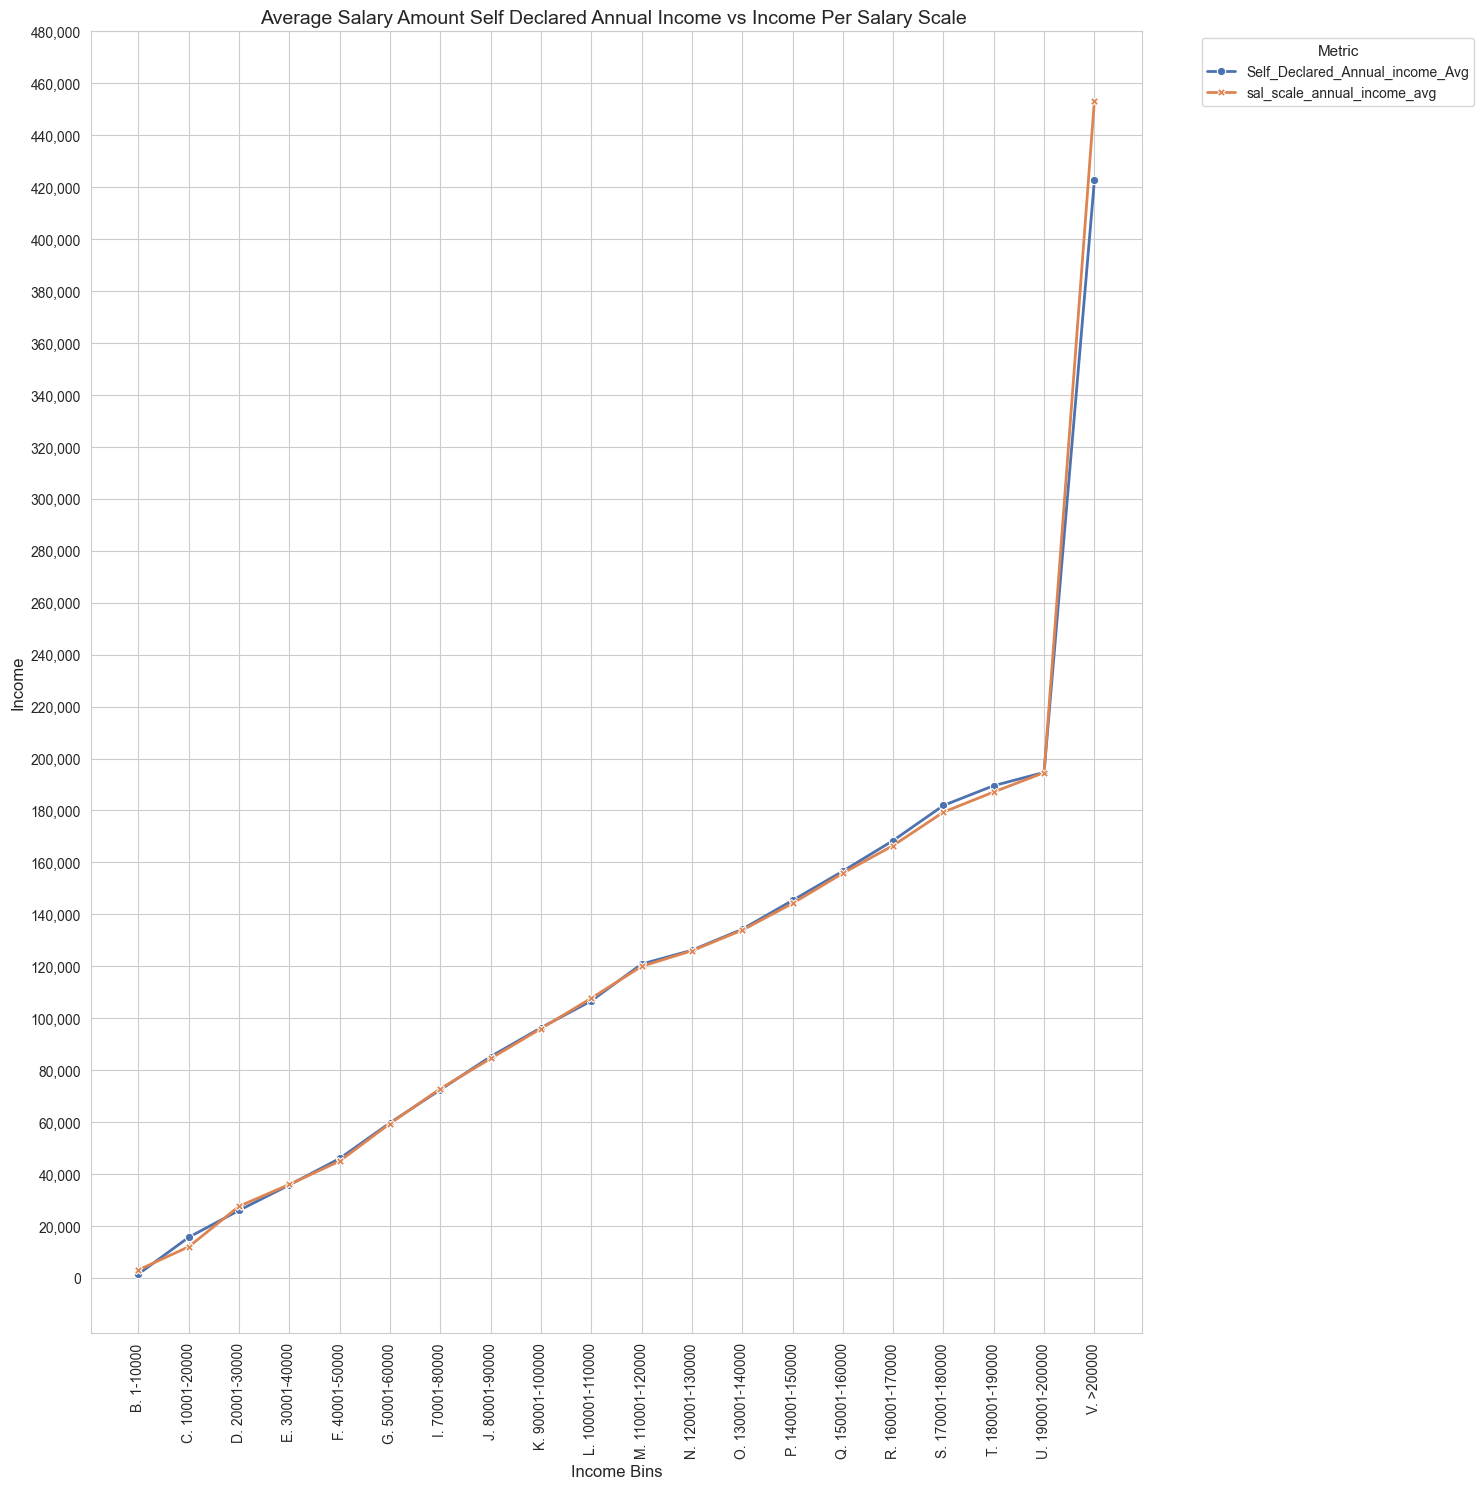

In [43]:
df_grouped = mdf.groupby('income_bin').agg({
    'Self_Declared_Annual_income_Avg': 'sum', 
    'sal_scale_annual_income_avg': 'sum', 
    })

# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=12)
ax.set_ylabel('Income', fontsize=12)
ax.set_title('Average Salary Amount Self Declared Annual Income vs Income Per Salary Scale ', fontsize=14, wrap=True)
ax.legend(title='Metric', title_fontsize='11', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format y-axis labels with thousand separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_ticks(range(0, 500000, 20000))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

In [44]:
df2 = df1[['customerId', 'AnnualIncomecalculated', 'AnnualIncomecalculated_bin']].copy()
# Assuming you already have df2 defined
resultdf4 = df2.groupby('AnnualIncomecalculated_bin').agg({
    'customerId': 'nunique',
    'AnnualIncomecalculated': 'sum'
}).reset_index()
resultdf4.sort_index()
resultdf4.rename(columns={'customerId':'cic_user_cnt'}, inplace = True)
# Convert 'incomeperSalaryScale' to integers
resultdf4['AnnualIncomecalculated'] = resultdf4['AnnualIncomecalculated'].astype(int)
resultdf4['cic_annual_income_avg'] = round(resultdf4['AnnualIncomecalculated']/ resultdf4['cic_user_cnt'], 3)
resultdf4

,AnnualIncomecalculated_bin,cic_user_cnt,AnnualIncomecalculated,cic_annual_income_avg
0,A. <0,242018,0,0.000
1,B. 1-10000,69,18893,273.812
2,C. 10001-20000,7,107000,15285.714
3,D. 20001-30000,21,670611,31933.857
4,E. 30001-40000,12,439300,36608.333
5,F. 40001-50000,6,329500,54916.667
6,G. 50001-60000,13,749524,57655.692
7,H. 60001-70000,19,1323131,69638.474
8,I. 70001-80000,23,1772333,77057.957
9,J. 80001-90000,26,2309671,88833.500


In [45]:
# Assuming you have already created resultdf2, resultdf3, and resultdf4

# Renaming the columns to have a common key for merging
resultdf2 = resultdf2.rename(columns={'AnnualdeclaredIncome_bin': 'income_bin'})
resultdf3 = resultdf3.rename(columns={'incomeperSalaryScale_bin': 'income_bin'})
resultdf4 = resultdf4.rename(columns={'AnnualIncomecalculated_bin': 'income_bin'})

# Merging the dataframes
merged_df = pd.merge(resultdf2, resultdf3, on='income_bin', how='outer')
merged_df = pd.merge(merged_df, resultdf4, on='income_bin', how='outer')

# Display the result
merged_df

,income_bin,Self_Declared_user_cnt,AnnualdeclaredIncome,Self_Declared_Annual_income_Avg,sal_scale_user_cnt,incomeperSalaryScale,sal_scale_annual_income_avg,cic_user_cnt,AnnualIncomecalculated,cic_annual_income_avg
0,A. <0,20,0,0.0,15853.0,0.000000e+00,0.000,242018,0,0.000
1,B. 1-10000,50,74640,1492.8,6.0,1.854000e+04,3090.000,69,18893,273.812
2,C. 10001-20000,24,375780,15657.5,1.0,1.200000e+04,12000.000,7,107000,15285.714
3,D. 20001-30000,48,1248720,26015.0,1.0,2.760000e+04,27600.000,21,670611,31933.857
4,E. 30001-40000,46,1647600,35817.391,4.0,1.440000e+05,36000.000,12,439300,36608.333
5,F. 40001-50000,47,2161440,45988.085,2.0,9.000000e+04,45000.000,6,329500,54916.667
6,G. 50001-60000,247,14749740,59715.547,11.0,6.540000e+05,59454.545,13,749524,57655.692
7,H. 60001-70000,11,709272,64479.273,NaN,NaN,NaN,19,1323131,69638.474
8,I. 70001-80000,101,7318800,72463.366,7.0,5.100000e+05,72857.143,23,1772333,77057.957
9,J. 80001-90000,119,10141860,85225.714,17.0,1.436400e+06,84494.118,26,2309671,88833.500


In [46]:
merged_df['sal_scale_user_cnt'] = merged_df['sal_scale_user_cnt'].fillna(0)
merged_df['incomeperSalaryScale'] = merged_df['incomeperSalaryScale'].fillna(0)
merged_df['Self_Declared_Annual_income_Avg']= merged_df['Self_Declared_Annual_income_Avg'].fillna(0)
merged_df['sal_scale_annual_income_avg']= merged_df['sal_scale_annual_income_avg'].fillna(0)
merged_df['cic_annual_income_avg'] = merged_df['cic_annual_income_avg'].fillna(0)
merged_df['sal_scale_user_cnt'] = merged_df['sal_scale_user_cnt'].astype(int)
merged_df['incomeperSalaryScale'] = merged_df['incomeperSalaryScale'].astype(int)
merged_df['Self_Declared_Annual_income_Avg']= merged_df['Self_Declared_Annual_income_Avg'].astype(int)
merged_df['sal_scale_annual_income_avg']= merged_df['sal_scale_annual_income_avg'].astype(int)
merged_df['cic_annual_income_avg'] = merged_df['cic_annual_income_avg'].astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   income_bin                       22 non-null     object
 1   Self_Declared_user_cnt           22 non-null     int64 
 2   AnnualdeclaredIncome             22 non-null     Int64 
 3   Self_Declared_Annual_income_Avg  22 non-null     int64 
 4   sal_scale_user_cnt               22 non-null     int64 
 5   incomeperSalaryScale             22 non-null     int64 
 6   sal_scale_annual_income_avg      22 non-null     int64 
 7   cic_user_cnt                     22 non-null     int64 
 8   AnnualIncomecalculated           22 non-null     int64 
 9   cic_annual_income_avg            22 non-null     int64 
dtypes: Int64(1), int64(8), object(1)
memory usage: 1.9+ KB


In [47]:
mdf = merged_df[['income_bin', 'Self_Declared_Annual_income_Avg', 'sal_scale_annual_income_avg', 'cic_annual_income_avg']].copy()
mdf

,income_bin,Self_Declared_Annual_income_Avg,sal_scale_annual_income_avg,cic_annual_income_avg
0,A. <0,0,0,0
1,B. 1-10000,1492,3090,273
2,C. 10001-20000,15657,12000,15285
3,D. 20001-30000,26015,27600,31933
4,E. 30001-40000,35817,36000,36608
5,F. 40001-50000,45988,45000,54916
6,G. 50001-60000,59715,59454,57655
7,H. 60001-70000,64479,0,69638
8,I. 70001-80000,72463,72857,77057
9,J. 80001-90000,85225,84494,88833


In [50]:
mdf = mdf.drop(mdf[
    (mdf['income_bin'] == 0) | 
    (mdf['Self_Declared_Annual_income_Avg'] == 0) | 
    (mdf['sal_scale_annual_income_avg'] == 0) |
    (mdf['cic_annual_income_avg']==0) |
    (mdf['income_bin'] =='V. >200000')
].index)
mdf

,income_bin,Self_Declared_Annual_income_Avg,sal_scale_annual_income_avg,cic_annual_income_avg
1,B. 1-10000,1492,3090,273
2,C. 10001-20000,15657,12000,15285
3,D. 20001-30000,26015,27600,31933
4,E. 30001-40000,35817,36000,36608
5,F. 40001-50000,45988,45000,54916
6,G. 50001-60000,59715,59454,57655
8,I. 70001-80000,72463,72857,77057
9,J. 80001-90000,85225,84494,88833
10,K. 90001-100000,96319,95999,97457
11,L. 100001-110000,106682,107700,108564


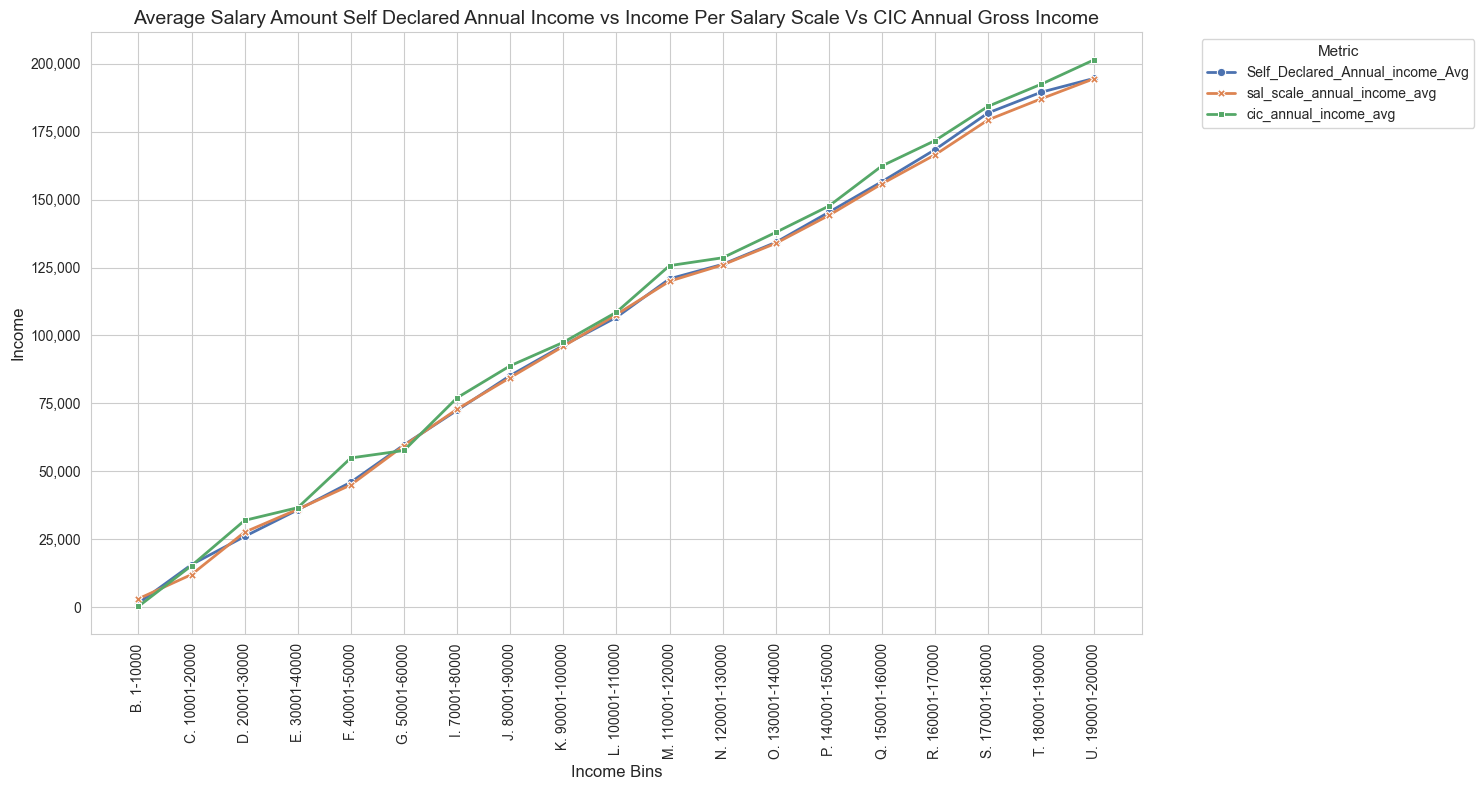

In [51]:
df_grouped = mdf.groupby('income_bin').agg({
    'Self_Declared_Annual_income_Avg': 'sum', 
    'sal_scale_annual_income_avg': 'sum', 
    'cic_annual_income_avg':'sum',
    })

# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=12)
ax.set_ylabel('Income', fontsize=12)
ax.set_title('Average Salary Amount Self Declared Annual Income vs Income Per Salary Scale Vs CIC Annual Gross Income', fontsize=14, wrap=True)
ax.legend(title='Metric', title_fontsize='11', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format y-axis labels with thousand separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax.yaxis.set_ticks(range(0, 500000, 50000))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
dfd = df_grouped.reset_index()
dfd

In [ ]:
dfd.to_csv("SelfDeclaredVsIncomePerSalaryScaleVsCICAnnualGrossIncome.csv", index = False)

In [56]:
df_grouped = mdf.groupby('income_bin').agg({
    'Self_Declared_Annual_income_Avg': 'sum',
    'sal_scale_annual_income_avg': 'sum',
    'cic_annual_income_avg': 'sum',
})

# Create the plot
fig = px.line(df_grouped,
             x=df_grouped.index,
             y=['Self_Declared_Annual_income_Avg', 'sal_scale_annual_income_avg', 'cic_annual_income_avg'],
             title='Average Salary Amount Self Declared Annual Income vs Income Per Salary Scale Vs CIC Annual Gross Income',
             height=800)  # Set the height of the plot to 800 pixels

# Customize line styles and widths
dash_styles = ['solid', 'dash', 'dot']

for i in range(len(fig['data'])):
    fig['data'][i]['line']['width'] = 2
    fig['data'][i]['line']['dash'] = dash_styles[i]

fig.show()

In [59]:
# Assuming you have already created resultdf2, resultdf3, and resultdf4

# Renaming the columns to have a common key for merging
resultdf2 = resultdf2.rename(columns={'AnnualdeclaredIncome_bin': 'income_bin'})
resultdf3 = resultdf3.rename(columns={'incomeperSalaryScale_bin': 'income_bin'})
resultdf4 = resultdf4.rename(columns={'AnnualIncomecalculated_bin': 'income_bin'})

# Merging the dataframes
merged_df = pd.merge(resultdf2, resultdf3, on='income_bin', how='outer')
merged_df = pd.merge(merged_df, resultdf4, on='income_bin', how='outer')

# Display the result
merged_df

,income_bin,Self_Declared_user_cnt,AnnualdeclaredIncome,Self_Declared_Annual_income_Avg,sal_scale_user_cnt,incomeperSalaryScale,sal_scale_annual_income_avg,cic_user_cnt,AnnualIncomecalculated,cic_annual_income_avg
0,A. <0,20,0,0.0,15853.0,0.000000e+00,0.000,242018,0,0.000
1,B. 1-10000,50,74640,1492.8,6.0,1.854000e+04,3090.000,69,18893,273.812
2,C. 10001-20000,24,375780,15657.5,1.0,1.200000e+04,12000.000,7,107000,15285.714
3,D. 20001-30000,48,1248720,26015.0,1.0,2.760000e+04,27600.000,21,670611,31933.857
4,E. 30001-40000,46,1647600,35817.391,4.0,1.440000e+05,36000.000,12,439300,36608.333
5,F. 40001-50000,47,2161440,45988.085,2.0,9.000000e+04,45000.000,6,329500,54916.667
6,G. 50001-60000,247,14749740,59715.547,11.0,6.540000e+05,59454.545,13,749524,57655.692
7,H. 60001-70000,11,709272,64479.273,NaN,NaN,NaN,19,1323131,69638.474
8,I. 70001-80000,101,7318800,72463.366,7.0,5.100000e+05,72857.143,23,1772333,77057.957
9,J. 80001-90000,119,10141860,85225.714,17.0,1.436400e+06,84494.118,26,2309671,88833.500


In [61]:
mdf = merged_df[['income_bin', 'Self_Declared_user_cnt', 'sal_scale_user_cnt', 'cic_user_cnt']].copy()
mdf

,income_bin,Self_Declared_user_cnt,sal_scale_user_cnt,cic_user_cnt
0,A. <0,20,15853.0,242018
1,B. 1-10000,50,6.0,69
2,C. 10001-20000,24,1.0,7
3,D. 20001-30000,48,1.0,21
4,E. 30001-40000,46,4.0,12
5,F. 40001-50000,47,2.0,6
6,G. 50001-60000,247,11.0,13
7,H. 60001-70000,11,NaN,19
8,I. 70001-80000,101,7.0,23
9,J. 80001-90000,119,17.0,26


In [63]:
mdf = mdf.drop(mdf[
    (mdf['income_bin'] == 0) | 
    (mdf['Self_Declared_user_cnt'] == 0) | 
    (mdf['sal_scale_user_cnt'] == 0) |
    (mdf['cic_user_cnt']==0) |
    (mdf['income_bin'] =='V. >200000') |
    (mdf['income_bin'] =='A. <0')
].index)
mdf

,income_bin,Self_Declared_user_cnt,sal_scale_user_cnt,cic_user_cnt
1,B. 1-10000,50,6.0,69
2,C. 10001-20000,24,1.0,7
3,D. 20001-30000,48,1.0,21
4,E. 30001-40000,46,4.0,12
5,F. 40001-50000,47,2.0,6
6,G. 50001-60000,247,11.0,13
7,H. 60001-70000,11,NaN,19
8,I. 70001-80000,101,7.0,23
9,J. 80001-90000,119,17.0,26
10,K. 90001-100000,303,39.0,68


In [64]:
df_grouped = mdf.groupby('income_bin').agg({
    'Self_Declared_user_cnt': 'max',
    'sal_scale_user_cnt': 'max',
    'cic_user_cnt': 'max',
})

# Create the plot
fig = px.line(df_grouped,
             x=df_grouped.index,
             y=['Self_Declared_user_cnt', 'sal_scale_user_cnt', 'cic_user_cnt'],
             title='Count of Unique Customer for  Self Declared Annual Income vs Income Per Salary Scale vs CIC Gross Annual Income by Income Bins',
             height=800)  # Set the height of the plot to 800 pixels

# Customize line styles and widths
dash_styles = ['solid', 'dash', 'dot']

for i in range(len(fig['data'])):
    fig['data'][i]['line']['width'] = 2
    fig['data'][i]['line']['dash'] = dash_styles[i]

fig.show()